# Data 3550 - Homework 5

### Professor Ramchandra Rimal
### Nicholas Sartino
### M00392300

In [70]:
# Install Modules if needed

#!pip install missingno

In [71]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above
# trick to widen the screen
from IPython.core.display import display, HTML
#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc

# 1. (20 points) For this problem you need to use the Heart dataset and seek to classify the patient have AHD or not using classification trees and related approaches.

 1. (a) Preprocess the data, you may need to convert the categorical variables to dummy variables, impute or drop the missing values. (3 points)



In [72]:
# Read Data
df = pd.read_csv('Heart.csv', index_col=0)

In [73]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [74]:
# Preview data
df.head(303)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [75]:
# Basic Stats
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


<Axes: >

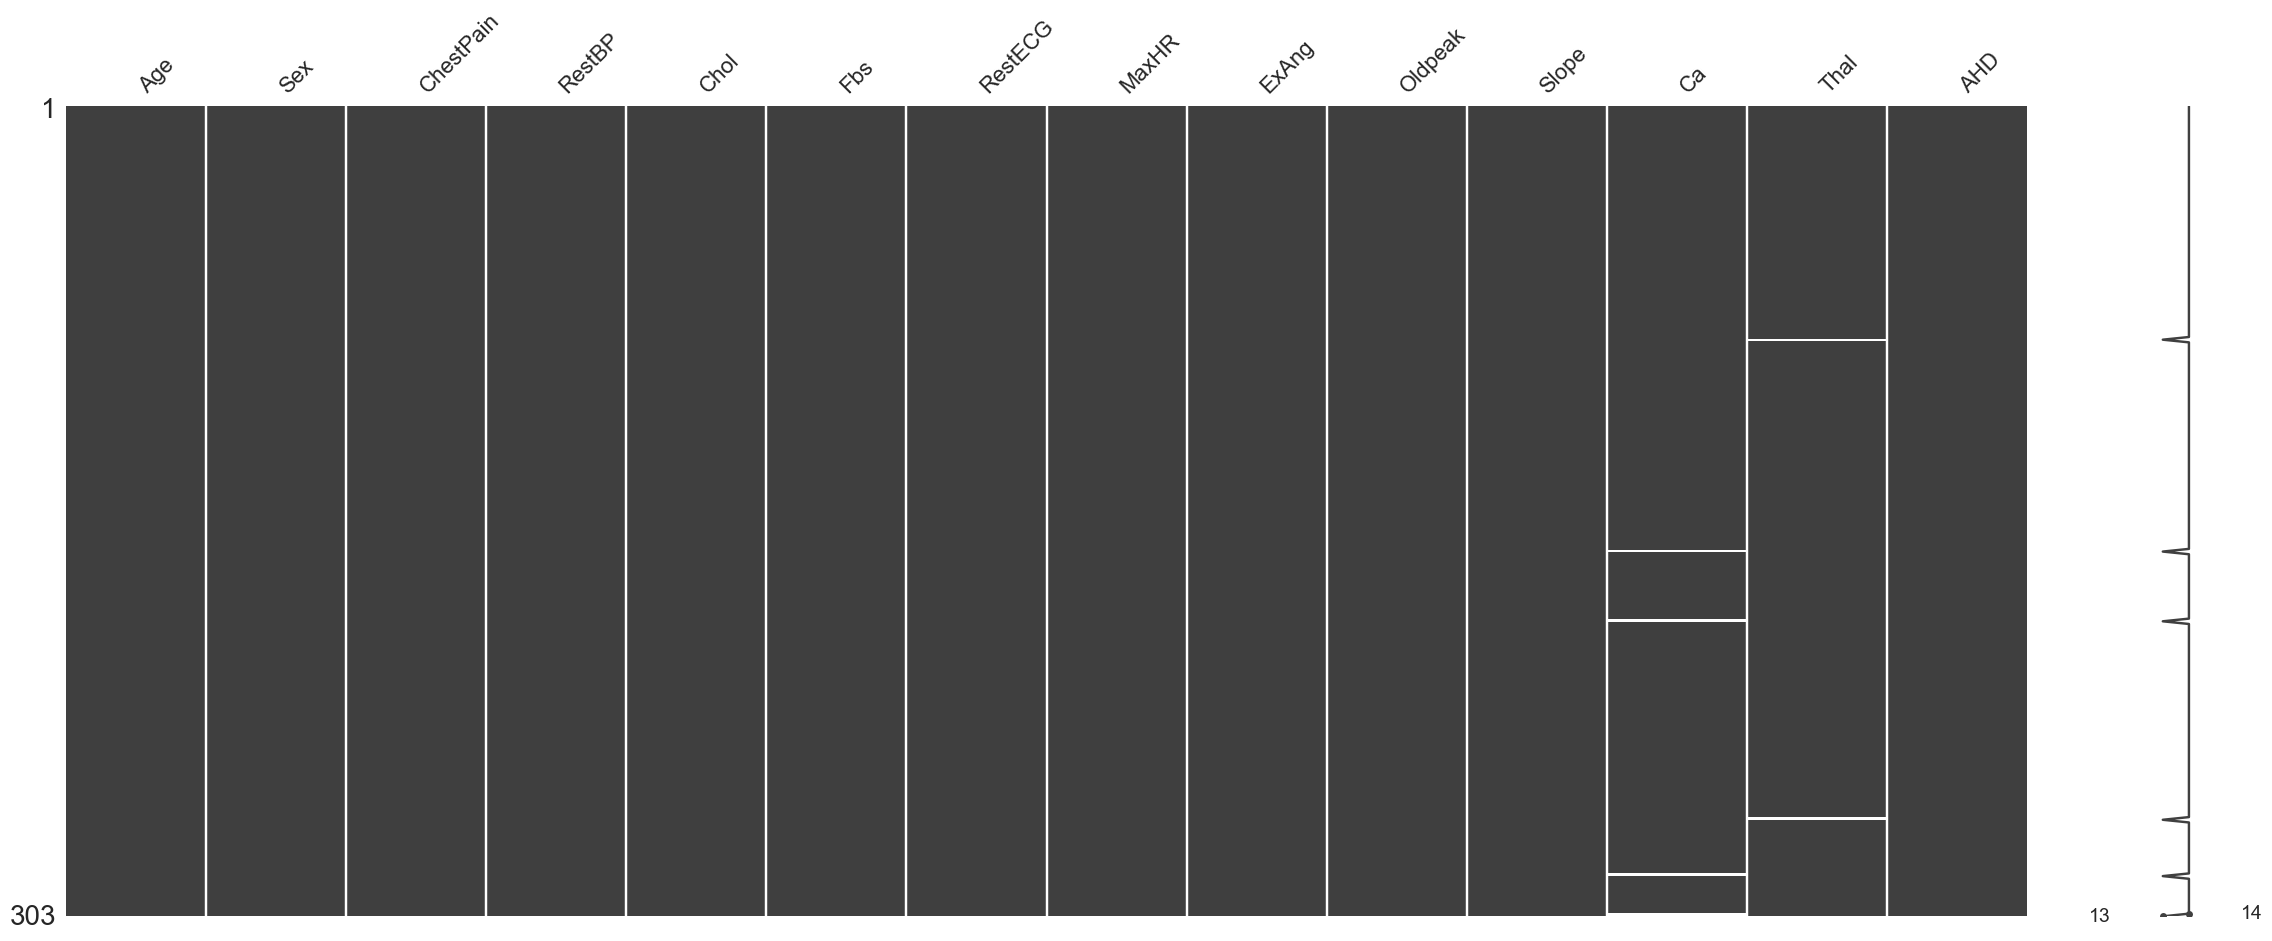

In [76]:
# Visualize missing values
msno.matrix(df)

In [77]:
# Confirm NA Counts
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

Because there are only a few rows with NaN values, I decided to drop them instead of filling with the mean value.  The values for 'Ca' appear to all be integers, but the mean is a decimal, so I didn't want to use the mean here.  The field 'Thal' is a description field that I don't know enough about to attempt substituting or inferring the correct value.

In [78]:
# Drop rows with NaN values in any column
df = df.dropna()

In [79]:
# Create dummies for categorical values and drop them from df

# Select categorical columns (object types) excluding the target column
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['AHD'])

# Create binary dummies for categorical columns
dummies = pd.get_dummies(df[categorical_columns], drop_first=False)

# Append the dummies to the original DataFrame
df = pd.concat([df, dummies], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)


In [80]:
# Select binary dummy columns (True/False)
binary_dummy_columns = df.select_dtypes(include=bool).columns

# Replace True/False with 1/0 in the binary dummy columns
df[binary_dummy_columns] = df[binary_dummy_columns].astype(int)

In [81]:
# Map 'Yes' to 1 and 'No' to 0
df['AHD'] = df['AHD'].map({'Yes': 1, 'No': 0})

In [82]:
df.head(302)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,0,123,1,0.2,2,0.0,1,1,0,0,0,0,0,1
299,45,1,110,264,0,0,132,0,1.2,2,0.0,1,0,0,0,1,0,0,1
300,68,1,144,193,1,0,141,0,3.4,2,2.0,1,1,0,0,0,0,0,1
301,57,1,130,131,0,0,115,1,1.2,2,1.0,1,1,0,0,0,0,0,1


1. (b) Split the data set into a training set and a test set in which training set consists of 70% of the data and the remaining data on the test set. (1 point)

In [83]:
# Separate the features (X) and the target variable (y)
X = df.drop('AHD', axis=1)  # Features
y = df['AHD']  # Target variable

# Split the data into a training set and a test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (207, 18) (207,)
Test set shape: (90, 18) (90,)


2. (a) Fit a tree to the training data, with AHD as the response and the other variables as predictors. (1 points)

In [84]:
# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the decision tree to the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

2. (b) Calculate the accuracy, sensitivity and specificity on the training data. Describe the results obtained. (1 points)

In [85]:
# Make predictions on the training set
y_train_pred = tree_classifier.predict(X_train)

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training Data:", accuracy_train)

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Extract True Positives, True Negatives, False Positives, and False Negatives
TP_train, TN_train, FP_train, FN_train = conf_matrix_train.ravel()

# Calculate sensitivity and specificity on the training set
sensitivity_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / (TN_train + FP_train)

print("Sensitivity on Training Data:", sensitivity_train)
print("Specificity on Training Data:", specificity_train)

Accuracy on Training Data: 1.0
Sensitivity on Training Data: 0.5362318840579711
Specificity on Training Data: nan


/var/folders/q_/tlj94ng165zc5l_0x0clcwg00000gn/T/ipykernel_56607/318450261.py:16: RuntimeWarning: invalid value encountered in scalar divide
  specificity_train = TN_train / (TN_train + FP_train)


2. (c) Calculate the accuracy, sensitivity and specificity on the test data. Describe the results obtained. (2 points)

In [86]:
# Make predictions on the test set
y_test_pred = tree_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", accuracy_test)

# Calculate confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extract True Positives, True Negatives, False Positives, and False Negatives for the test set
TP_test, TN_test, FP_test, FN_test = conf_matrix_test.ravel()

# Calculate sensitivity and specificity on the test set
sensitivity_test = TP_test / (TP_test + FN_test)
specificity_test = TN_test / (TN_test + FP_test)

print("Sensitivity on Test Data:", sensitivity_test)
print("Specificity on Test Data:", specificity_test)

Accuracy on Test Data: 0.7111111111111111
Sensitivity on Test Data: 0.515625
Specificity on Test Data: 0.6153846153846154


2. (d) Create a variable importance plot. (1 points)

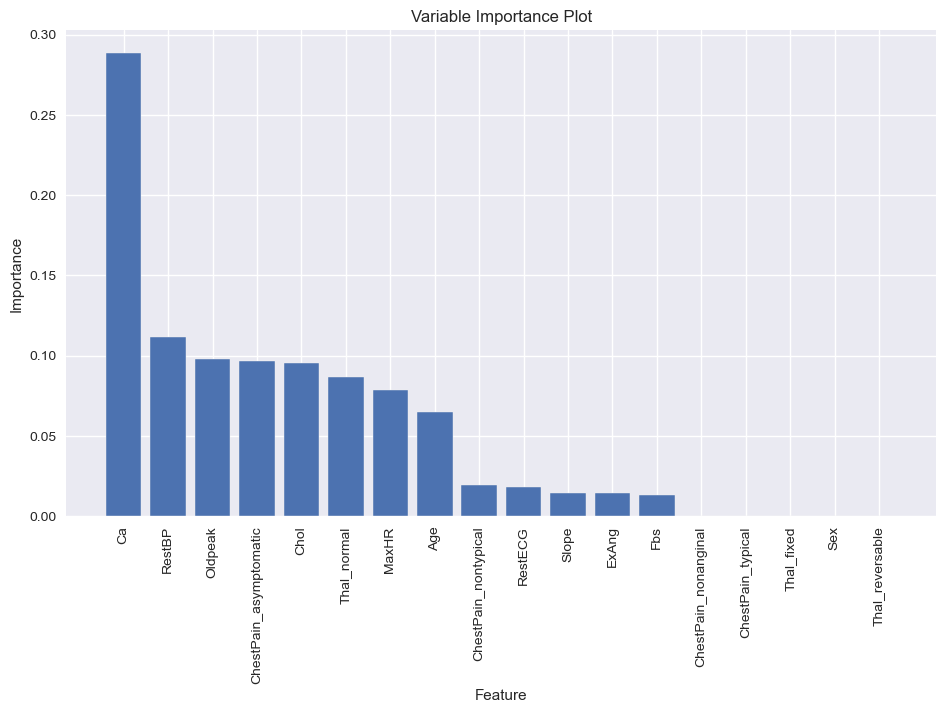

In [87]:
# Get feature importances from the trained decision tree
feature_importances = tree_classifier.feature_importances_

# Get the names of the features (column names)
feature_names = X.columns

# Sort the features based on their importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plotting the variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Variable Importance Plot")
plt.show()

3. (a) Using the result from part 1, Fit a tree to the training data, with AHD as the response and the most important 7 variables as predictors. (2 points)

In [88]:
# Get the names of the 7 most important features
top_features = feature_names[sorted_idx][:7]

# Select only the top 7 features from the original features
X_top_features = X[top_features]

# Split the data into a training set and a test set using the top features (70% training, 30% test)
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=42)

# Create a new decision tree classifier
tree_classifier_top = DecisionTreeClassifier(random_state=42)

# Fit the decision tree to the training data using only the top features
tree_classifier_top.fit(X_train_top, y_train)

DecisionTreeClassifier(random_state=42)

3. (b) Calculate the accuracy, sensitivity and specificity on the training data. Describe the results obtained. (2 points)

In [89]:
# Make predictions on the test set
y_test_pred_top = tree_classifier_top.predict(X_test_top)

# Calculate accuracy on the test set using the top features
accuracy_test_top = accuracy_score(y_test, y_test_pred_top)
print("Accuracy on Test Data using Top 7 Features:", accuracy_test_top)

# Calculate confusion matrix for the test set using the top features
conf_matrix_test_top = confusion_matrix(y_test, y_test_pred_top)

# Extract True Positives, True Negatives, False Positives, and False Negatives for the test set using the top features
TP_test_top, TN_test_top, FP_test_top, FN_test_top = conf_matrix_test_top.ravel()

# Calculate sensitivity and specificity on the test set using the top features
sensitivity_test_top = TP_test_top / (TP_test_top + FN_test_top)
specificity_test_top = TN_test_top / (TN_test_top + FP_test_top)

print("Sensitivity on Test Data using Top 7 Features:", sensitivity_test_top)
print("Specificity on Test Data using Top 7 Features:", specificity_test_top)

Accuracy on Test Data using Top 7 Features: 0.7333333333333333
Sensitivity on Test Data using Top 7 Features: 0.5151515151515151
Specificity on Test Data using Top 7 Features: 0.625


3. (c) What is the training accuracy? Is there any difference in score compared to the previous model that uses all predictors? (1 point)

In [90]:
# Make predictions on the training set using the model with all predictors
y_train_pred_all = tree_classifier.predict(X_train)

# Calculate accuracy on the training set using all predictors
accuracy_train_all = accuracy_score(y_train, y_train_pred_all)
print("Training Accuracy using All Predictors:", accuracy_train_all)

# Compare with the training accuracy of the model using the top 7 features
print("Training Accuracy using Top 7 Features:", accuracy_train)

Training Accuracy using All Predictors: 1.0
Training Accuracy using Top 7 Features: 1.0


3. (d) Create a plot of the tree, and interpret the results. (2 points)

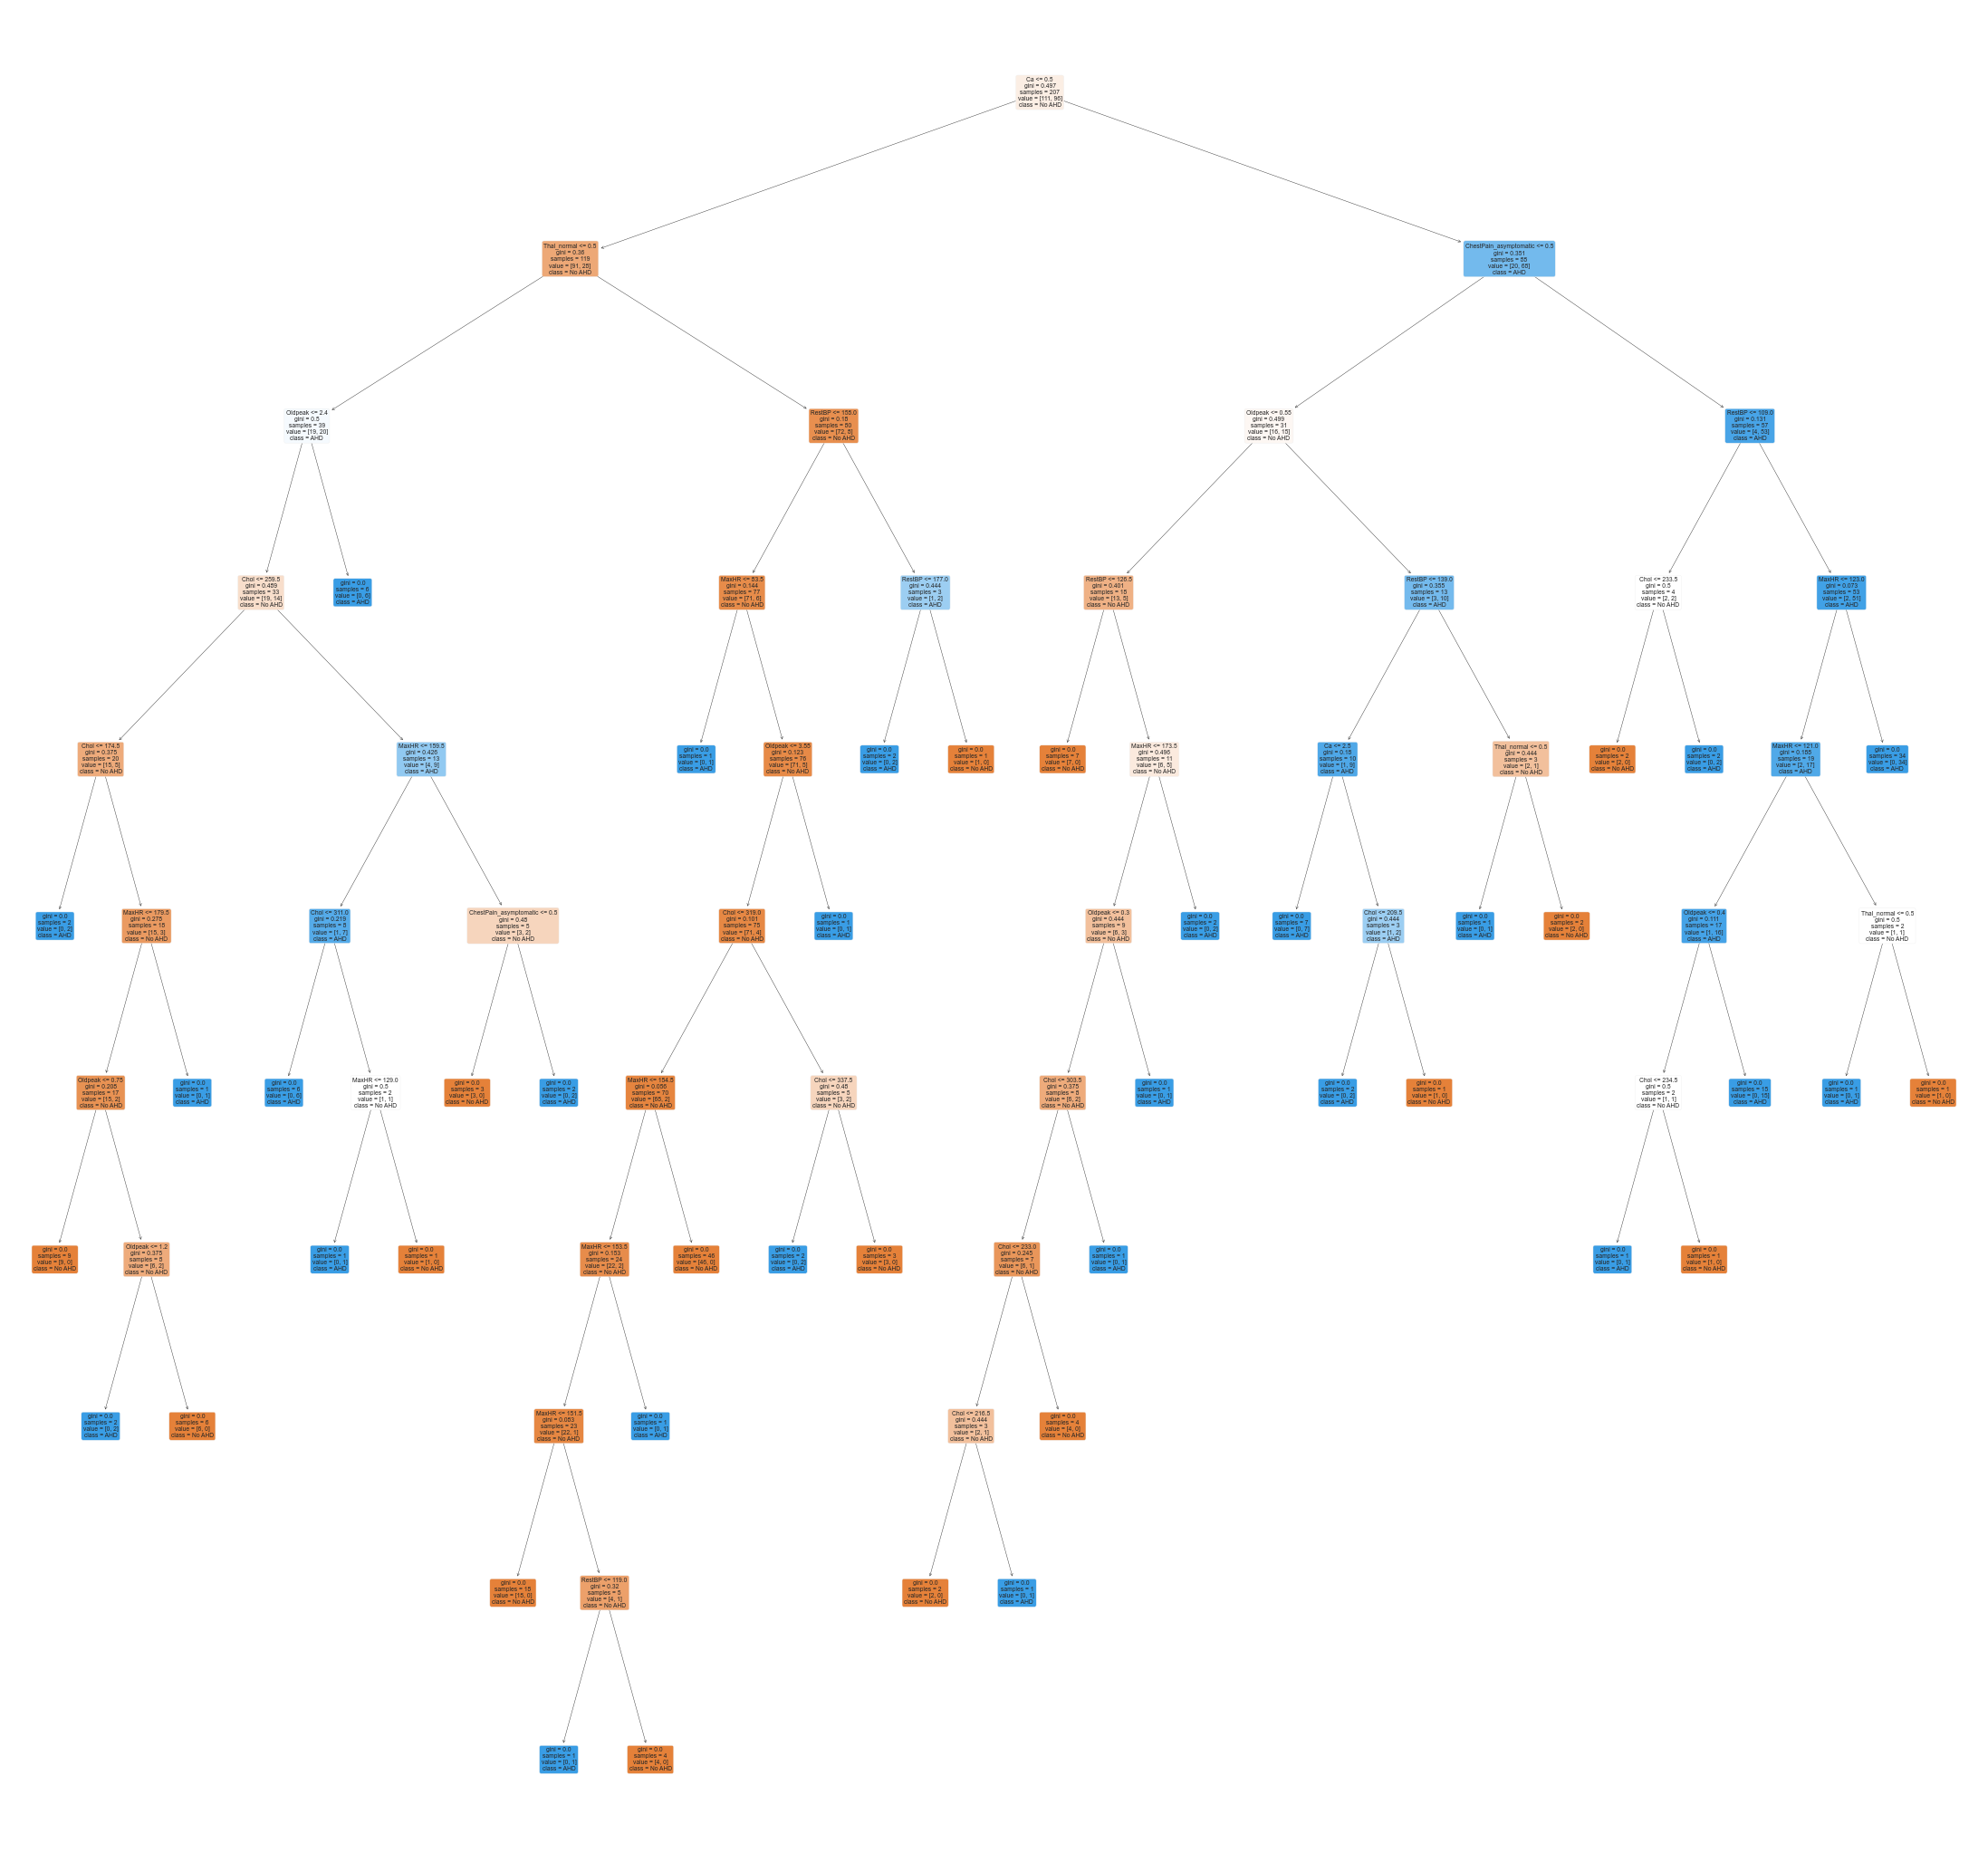

In [91]:
# Convert the Pandas Index to a list
top_features_list = top_features.tolist()# Create a list to store top_features

# Plot the decision tree
plt.figure(figsize=(25, 25))
plot_tree(tree_classifier_top, feature_names=top_features_list, class_names=['No AHD', 'AHD'], filled=True, rounded=True)
plt.show()

3. (e) Pick one of the terminal nodes and interpret the information displayed. (2 points)

Gini:= 0.0
Samples:= 2
Value:= [0,2]
class:= AHD

This terminal node indicates that two samples from the test set made it this far in the tree and were both classified as having AHD.  

4. (a) Predict the response on the test data, and produce and plot a confusion matrix comparing the test labels to the predicted test labels.


<Figure size 800x600 with 0 Axes>

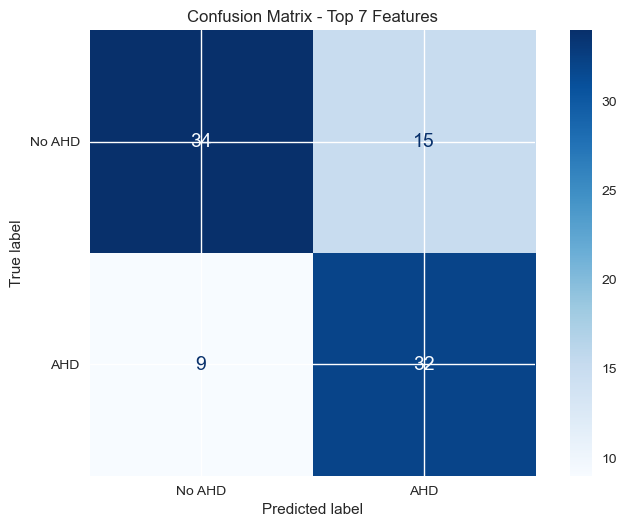

In [92]:
# Make predictions on the test set using the model with the top 7 features
y_test_pred_top = tree_classifier_top.predict(X_test_top)

# Calculate confusion matrix
conf_matrix_top = confusion_matrix(y_test, y_test_pred_top)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix_top, display_labels=['No AHD', 'AHD'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Top 7 Features")
plt.show()

4. (b) What is the test accuracy? What would be the accuracy score without the model (i.e., if we just classify the observation to the class with higher count)? Based on the results, is the model useful or not? (1 point)

In [93]:
# Calculate test accuracy
accuracy_test_top = accuracy_score(y_test, y_test_pred_top)
print("Test Accuracy using Top 7 Features:", accuracy_test_top)

# Calculate baseline accuracy (assuming majority class prediction)
majority_class = np.argmax(np.bincount(y_test))  # Assuming binary classification (0 or 1)
baseline_accuracy = np.mean(y_test == majority_class)
print("Baseline Accuracy (Majority Class):", baseline_accuracy)

Test Accuracy using Top 7 Features: 0.7333333333333333
Baseline Accuracy (Majority Class): 0.5444444444444444


The model is useful because the accuracy is quite a bit higher than the baseline accuracy which indicates the model is an improvement over a simple majority class prediction.

4. (c) Plot a ROC curve and explain your observation. (2 points)

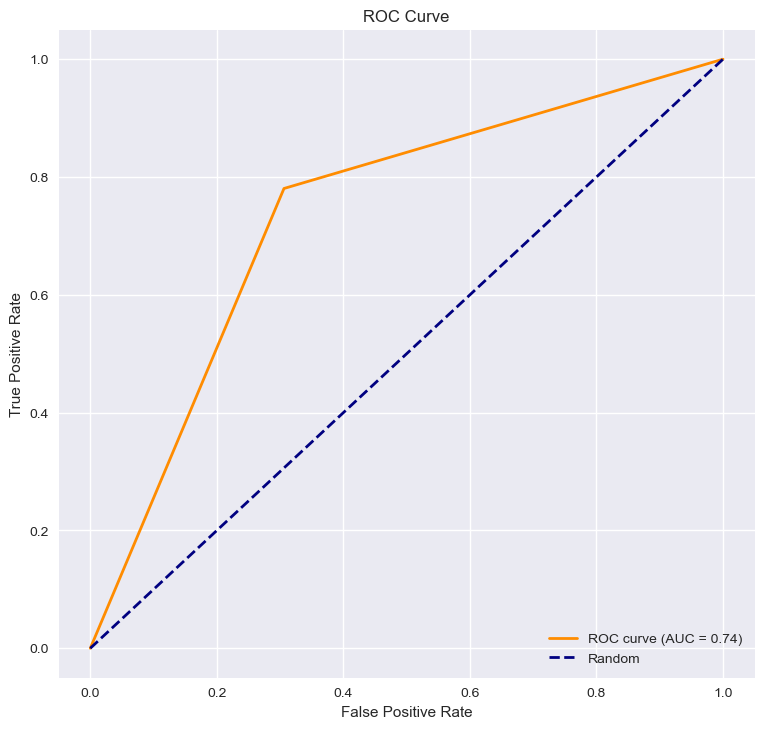

In [94]:
# Predict probabilities of positive class (class 1)
y_probabilities = tree_classifier_top.predict_proba(X_test_top)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 2. (10 points) For this problem you need to use the preprocessed Heart dataset used in Part 1 of Question 1 and seek to classify the patient have AHD or not using enseble methods.

1. (a) Fit a Random Forest Classifier to the training data, with AHD as the response and all other variables as predictors (not only the seven predictors chosen before). (2 points)

In [95]:
# Separate the features (X) and the target variable (y)
X = df.drop('AHD', axis=1)  # Features
y = df['AHD']  # Target variable

# Split the data into a training set and a test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

1. (b) Calculate the accuracy, sensitivity and specificity of the test data. Describe the results obtained. (2 points)

In [96]:
# Make predictions on the test set
y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

# Calculate confusion matrix for the test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Extract True Positives, True Negatives, False Positives, and False Negatives for the test set
TP_rf, TN_rf, FP_rf, FN_rf = conf_matrix_rf.ravel()

# Calculate sensitivity and specificity on the test set
sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)

print("Sensitivity of Random Forest Classifier:", sensitivity_rf)
print("Specificity of Random Forest Classifier:", specificity_rf)

Accuracy of Random Forest Classifier: 0.8444444444444444
Sensitivity of Random Forest Classifier: 0.5526315789473685
Specificity of Random Forest Classifier: 0.5


1. (c) Is it better than the results obtained from the single decision tree? (1 point)

Yes - the accuracy and sensitivity are both higher.

2. (a) Apply the 10-fold grid search cross validation to the training data to determine the best criterion, number of trees to use in a forest, maximum depth of the tree and maximum number of features to use; for the best prediction accuracy. Report the best value of the parameters selected by 10-fold grid search cross validation. (2 points)

In [97]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_accuracy = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validated Accuracy:", np.mean(cv_accuracy))

/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/base.py", li

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Cross-validated Accuracy: 0.806904761904762


2. (b) Run the repeated 5-fold cross-validation on the whole dataset using the best value of the parameters selected by 10-fold grid search cross validation. The number of repetitions is 30. (1 point)

In [98]:
# Separate the features (X) and the target variable (y)
X = df.drop('AHD', axis=1)  # Features
y = df['AHD']  # Target variable

# Create a Random Forest Classifier with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Create RepeatedStratifiedKFold with 5 folds and 30 repetitions
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=30, random_state=42)

# Perform cross-validation
cv_accuracy_repeated = cross_val_score(best_rf_model, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of repeated cross-validated accuracy
print("Repeated Cross-validated Accuracy (Mean):", np.mean(cv_accuracy_repeated))
print("Repeated Cross-validated Accuracy (Std Dev):", np.std(cv_accuracy_repeated))

Repeated Cross-validated Accuracy (Mean): 0.816623352165725
Repeated Cross-validated Accuracy (Std Dev): 0.046296746096743516


2. (c) Report the average accuracy obtained on the hold out fold. Is it different from the accuracy obtained in the previous part? If so, why? (2 points)

In [99]:
# Print accuracy for each repetition
for i, acc in enumerate(cv_accuracy_repeated, start=1):
    print(f"Repetition {i}: {acc}")

# Print the mean and standard deviation of repeated cross-validated accuracy
print("\nRepeated Cross-validated Accuracy (Mean):", np.mean(cv_accuracy_repeated))
print("Repeated Cross-validated Accuracy (Std Dev):", np.std(cv_accuracy_repeated))

Repetition 1: 0.8833333333333333
Repetition 2: 0.8166666666666667
Repetition 3: 0.711864406779661
Repetition 4: 0.7966101694915254
Repetition 5: 0.864406779661017
Repetition 6: 0.8166666666666667
Repetition 7: 0.8
Repetition 8: 0.847457627118644
Repetition 9: 0.8305084745762712
Repetition 10: 0.7966101694915254
Repetition 11: 0.8333333333333334
Repetition 12: 0.85
Repetition 13: 0.8813559322033898
Repetition 14: 0.7966101694915254
Repetition 15: 0.7966101694915254
Repetition 16: 0.8666666666666667
Repetition 17: 0.8
Repetition 18: 0.7796610169491526
Repetition 19: 0.7966101694915254
Repetition 20: 0.7796610169491526
Repetition 21: 0.6
Repetition 22: 0.8833333333333333
Repetition 23: 0.7627118644067796
Repetition 24: 0.8813559322033898
Repetition 25: 0.864406779661017
Repetition 26: 0.8166666666666667
Repetition 27: 0.8166666666666667
Repetition 28: 0.8813559322033898
Repetition 29: 0.7796610169491526
Repetition 30: 0.7796610169491526
Repetition 31: 0.8166666666666667
Repetition 32: 0.7

It is different (slightly higher).  This can be attributed to the random selection of data points for the training/test split with each repetition of the data split.

# 3. (BONUS) Do something with the classification modeling of the data provided. Note: You may want to explore new visualization/plot you haven’t already tried for the previous homework.

(a) You can implement any new techniques you learned outside this course and explain why this method is useful? (3 points)


(b) Or, you can visualize the data to provide some interesting insights that we do not know yet and explain it. (3 points)


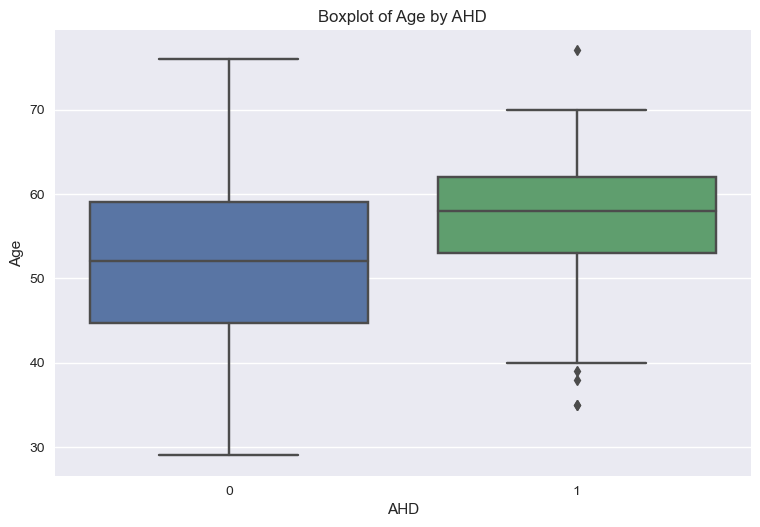

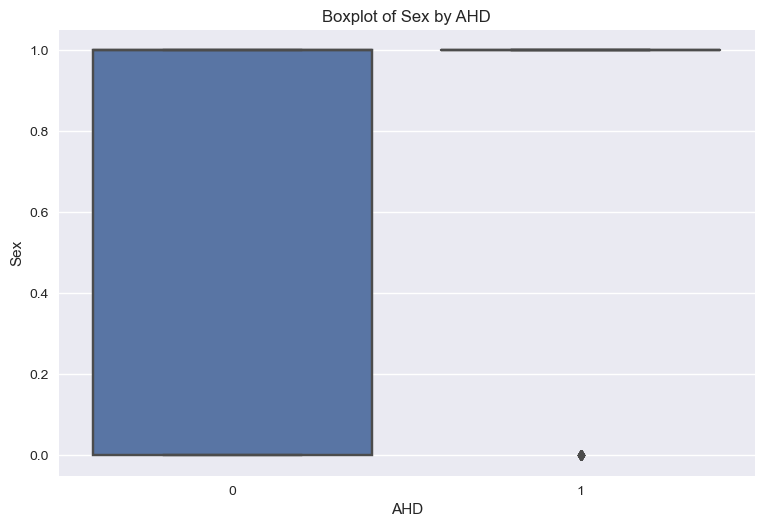

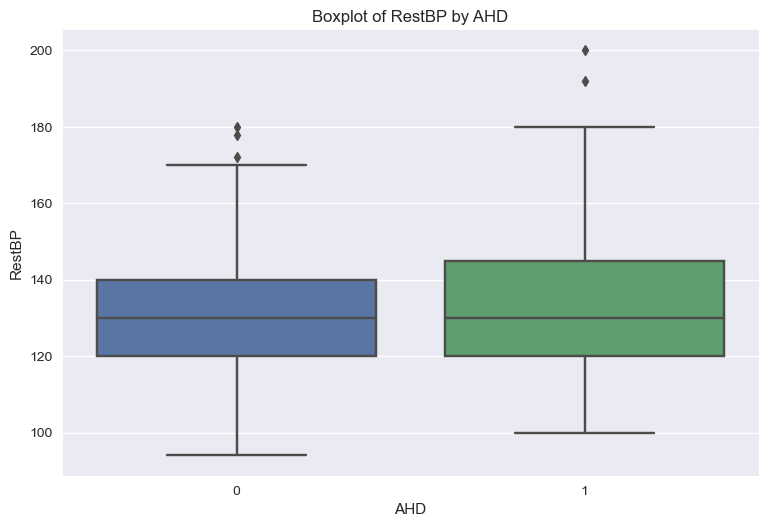

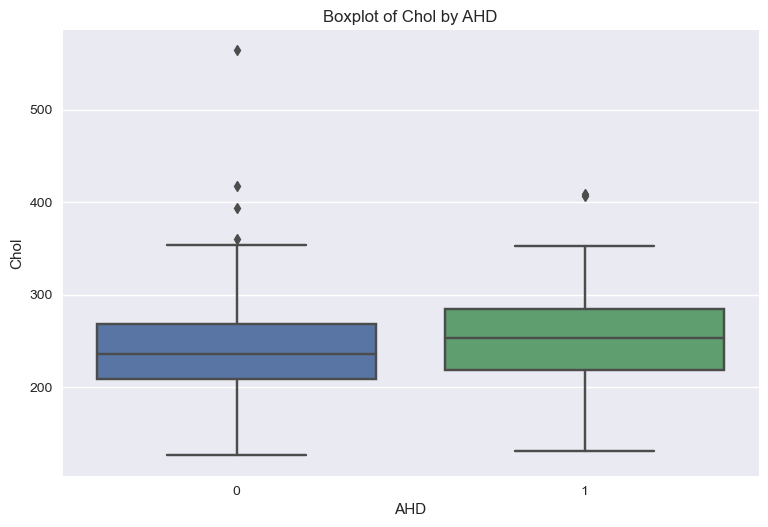

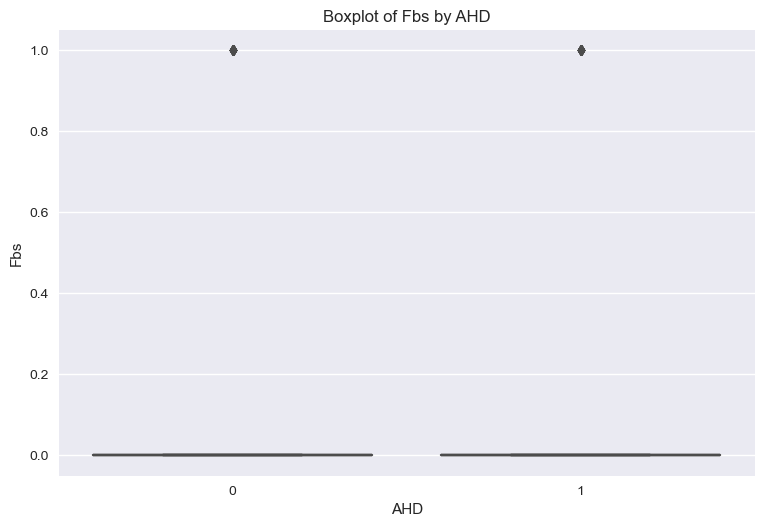

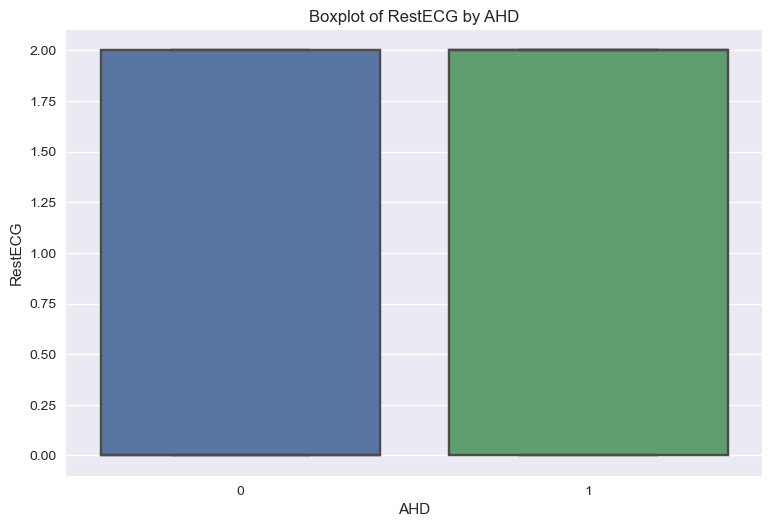

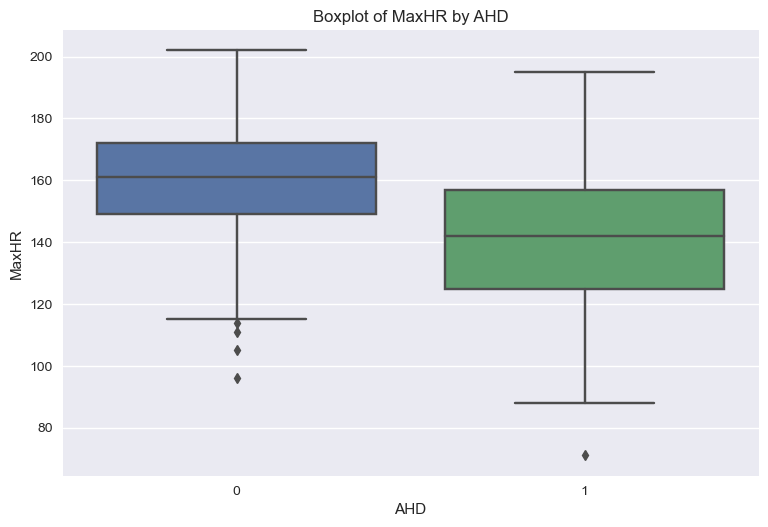

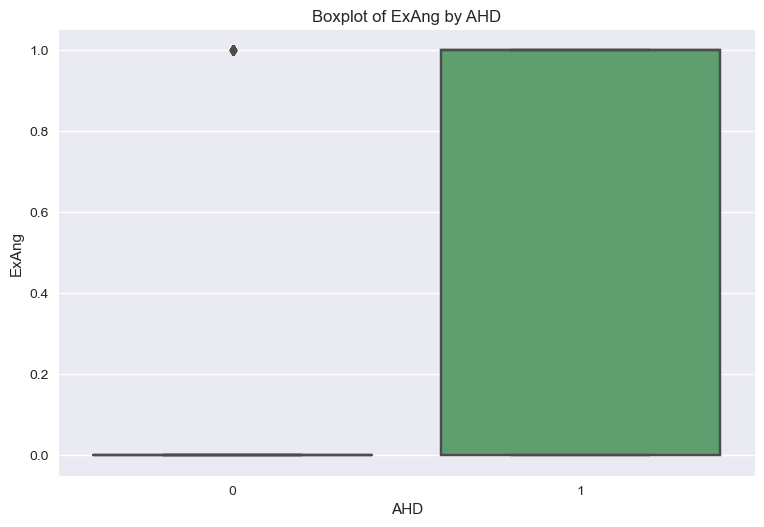

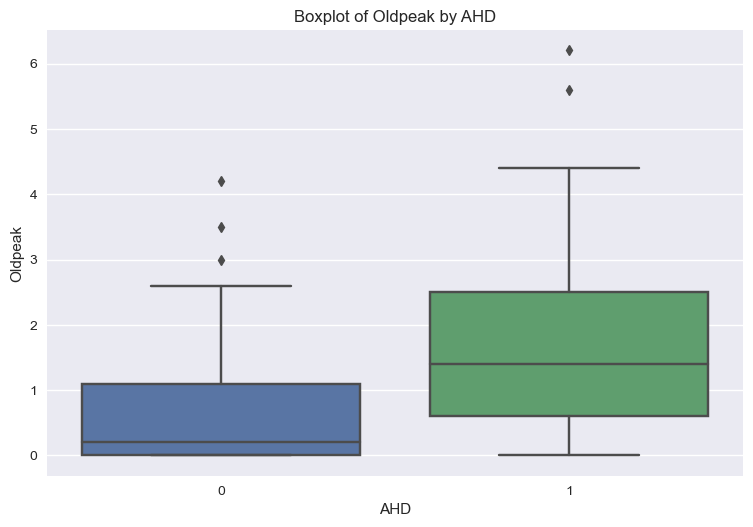

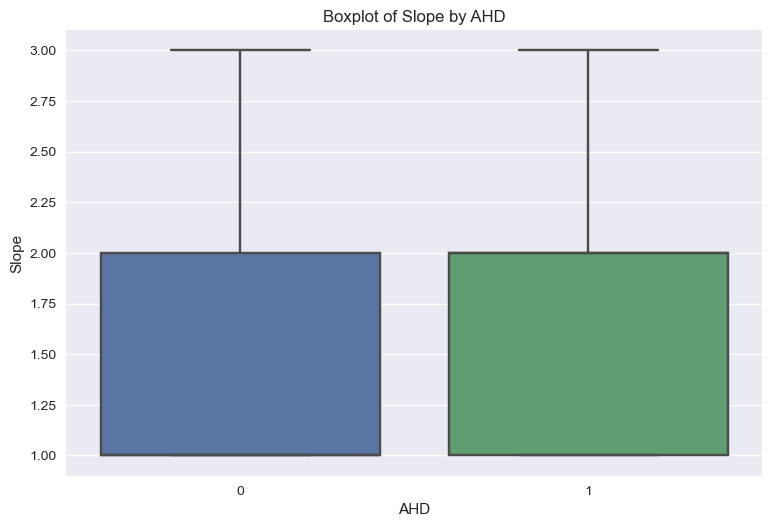

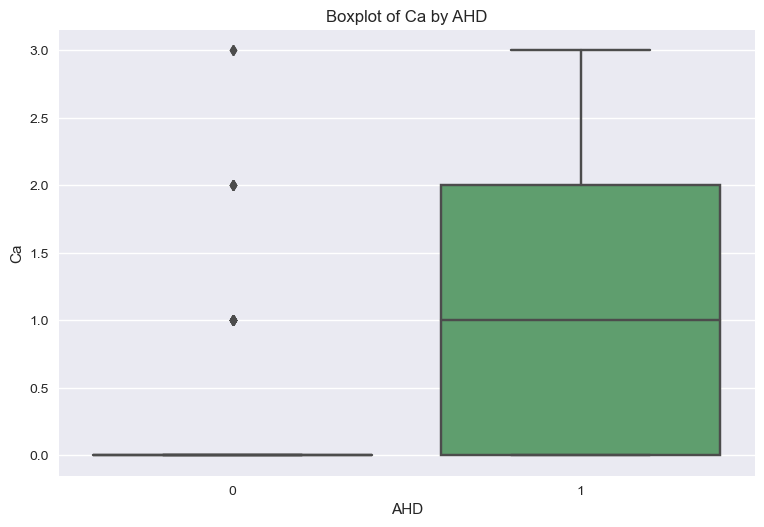

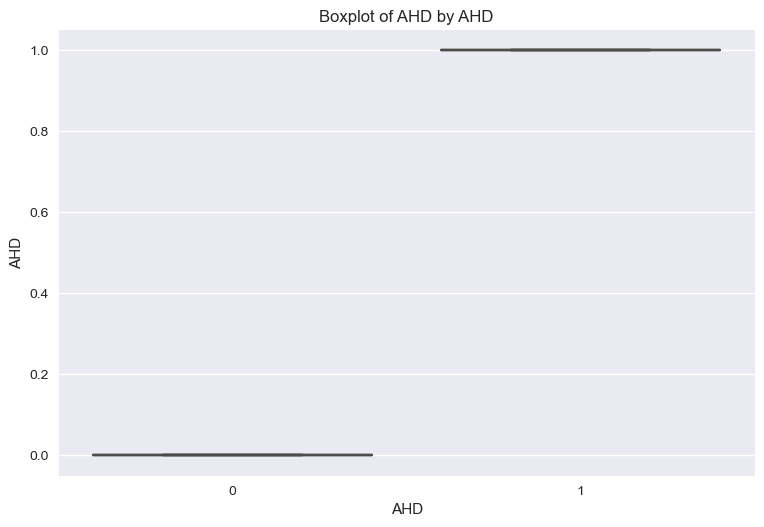

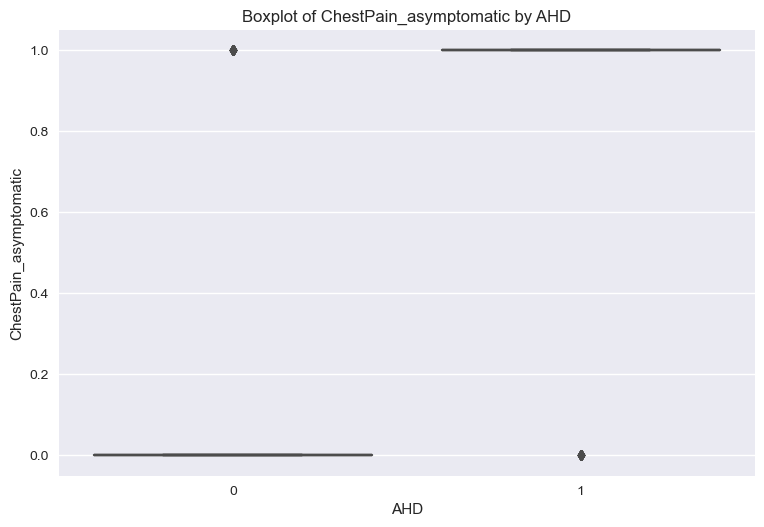

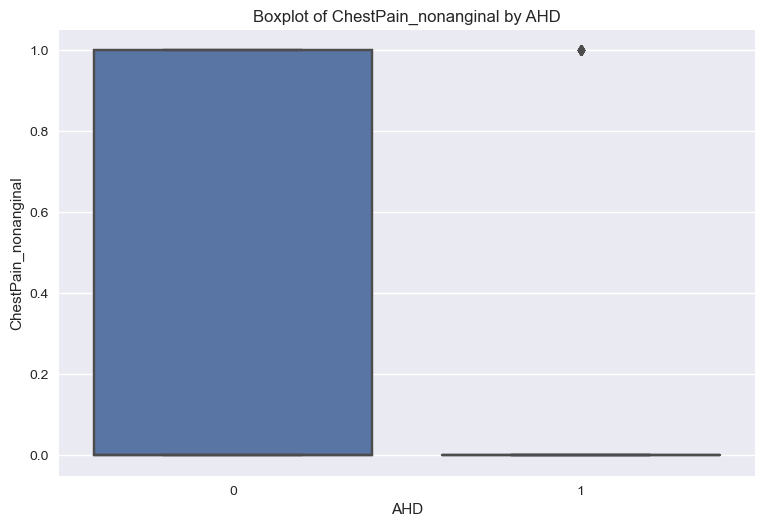

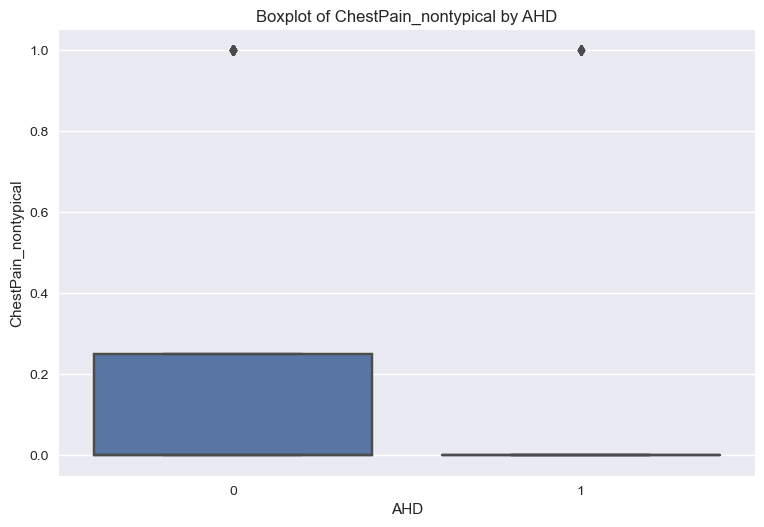

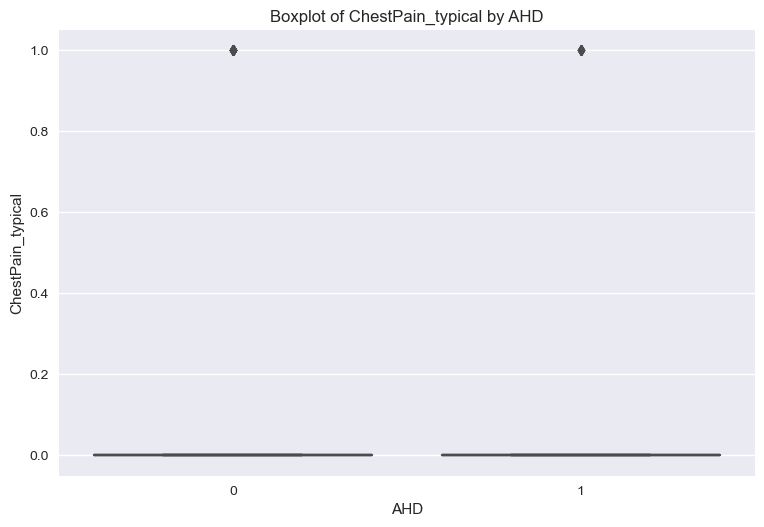

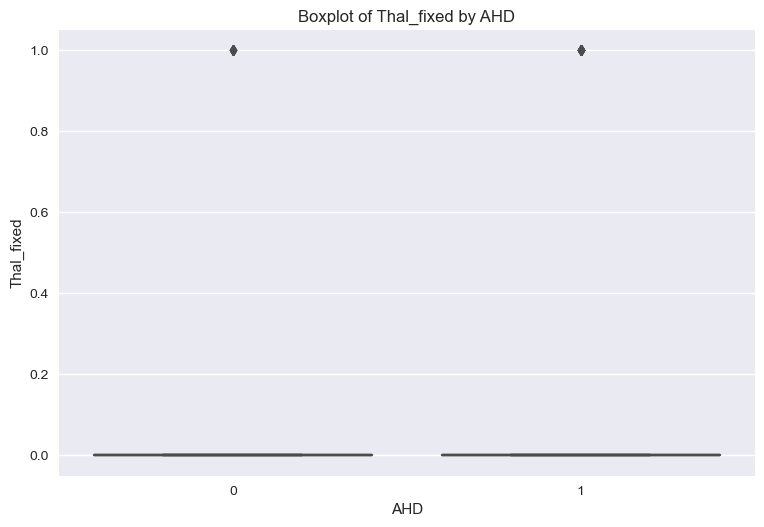

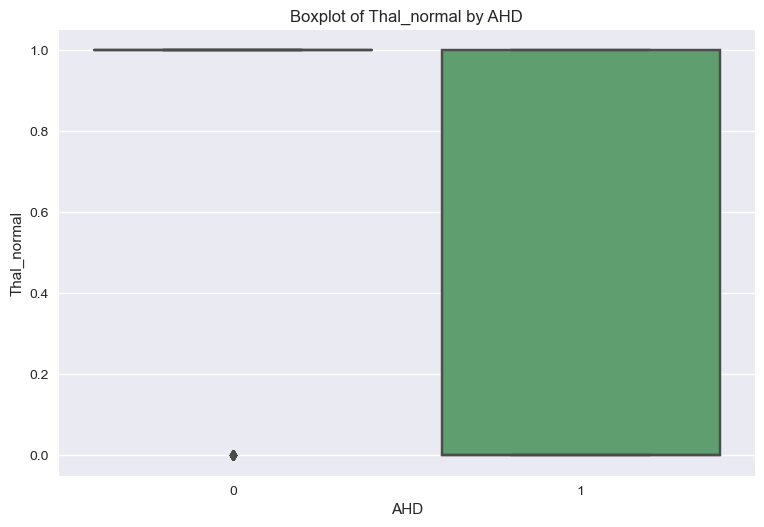

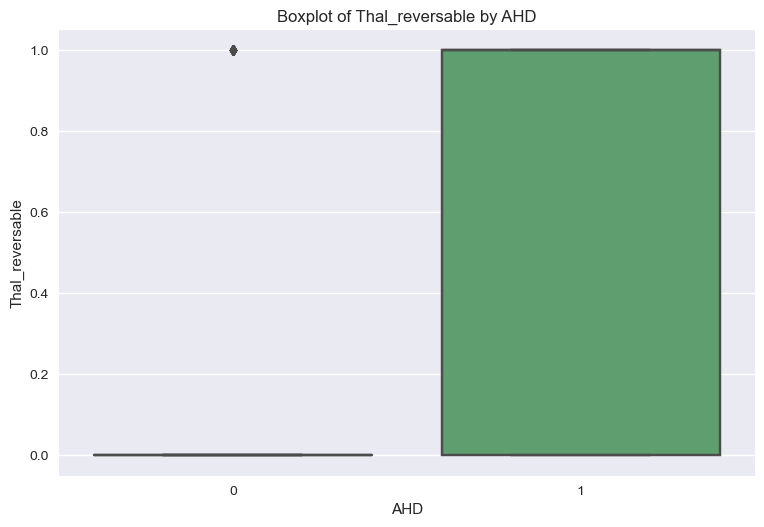

In [100]:
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x='AHD', y=column, data=df)
    plt.title(f'Boxplot of {column} by AHD')
    plt.show()

(c) Or, you can create the plot to analyze the classification error obtained from the best model you have developed for this homework and explain what unique insights you get from that visualization. (3 points)

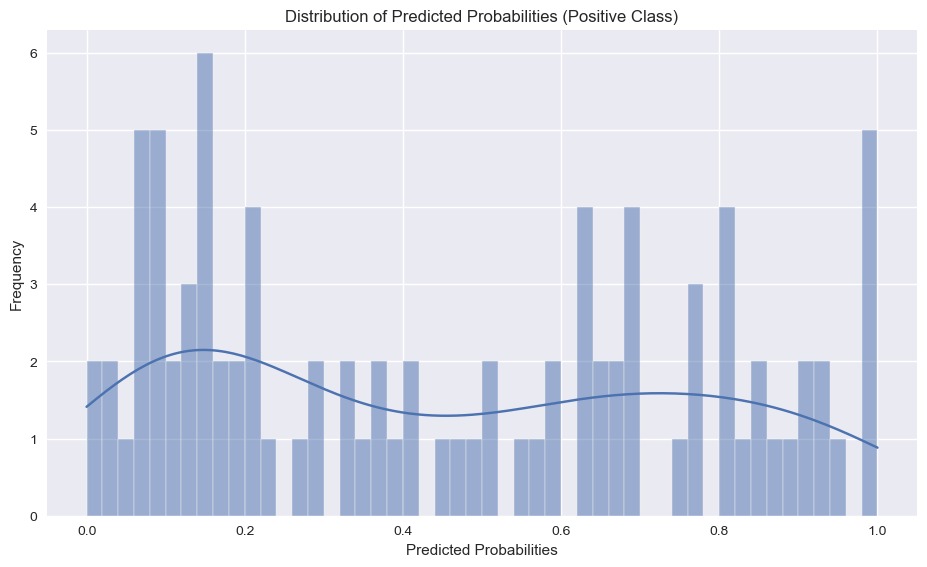

In [102]:
# Fit the Random Forest model to the training data
best_rf_model.fit(X_train, y_train)

# Predict probabilities of positive class (class 1)
y_probabilities = best_rf_model.predict_proba(X_test)[:, 1]

# Create a plot to analyze classification error
plt.figure(figsize=(10, 6))
sns.histplot(y_probabilities, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities (Positive Class)')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show()